# Homework 2 - eCommerce analytics - Group 9

### Libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns
import copy
import os

import datetime
import time

from functools import reduce
import functions

In [3]:
# paths of databases in zip and gz format to be underwritten(dataset from Oct 2019 to Apr 2020)
old_df_names = ['Old_data/2019-Oct.csv.zip', 'Old_data/2019-Nov.csv.zip','Old_data/2019-Dec.csv.gz',
                'Old_data/2020-Jan.csv.gz', 'Old_data/2020-Feb.csv.gz', 'Old_data/2020-Mar.csv.gz',
                'Old_data/2020-Apr.csv.gz']

# new paths of databases for csv files (dataset from Oct 2019 to Apr 2020)
df_names = ['Data/2019-Oct.csv', 'Data/2019-Nov.csv', 'Data/2019-Dec.csv',
            'Data/2020-Jan.csv', 'Data/2020-Feb.csv', 'Data/2020-Mar.csv', 
            'Data/2020-Apr.csv']

# months to analize 
months = ['October','November','December','January','February','March','April']




### Reading the dataset

A summary of the datasets.

The function <b>infos</b> shows some informations about the length of each dataset and the number of NaN values.

In [3]:
functions.infos(old_df_names, months)

Month October :
	- event_time has number of Nan : 0
	- event_type has number of Nan : 0
	- product_id has number of Nan : 0
	- category_id has number of Nan : 0
	- category_code has number of Nan : 13515609
	- brand has number of Nan : 6117080
	- price has number of Nan : 0
	- user_id has number of Nan : 0
	- user_session has number of Nan : 2
Total number of rows: 42448764


Month November :
	- event_time has number of Nan : 0
	- event_type has number of Nan : 0
	- product_id has number of Nan : 0
	- category_id has number of Nan : 0
	- category_code has number of Nan : 21898171
	- brand has number of Nan : 9224078
	- price has number of Nan : 0
	- user_id has number of Nan : 0
	- user_session has number of Nan : 10
Total number of rows: 67501979


Month December :
	- event_time has number of Nan : 0
	- event_type has number of Nan : 0
	- product_id has number of Nan : 0
	- category_id has number of Nan : 0
	- category_code has number of Nan : 7088848
	- brand has number of Nan : 8122

### Cleaning Data

We have decided to clean the data to be more memory-efficient since that we choosed to work with the extended DataFrame.

In [4]:
functions.make_new_csv(old_df_names, df_names)

In [5]:
functions.infos(df_names, months)

Month October :
	- event_time has number of Nan : 0
	- event_type has number of Nan : 0
	- product_id has number of Nan : 0
	- category_id has number of Nan : 0
	- category_code has number of Nan : 0
	- brand has number of Nan : 0
	- price has number of Nan : 0
	- user_id has number of Nan : 0
	- user_session has number of Nan : 0
Total number of rows: 26560620


Month November :
	- event_time has number of Nan : 0
	- event_type has number of Nan : 0
	- product_id has number of Nan : 0
	- category_id has number of Nan : 0
	- category_code has number of Nan : 0
	- brand has number of Nan : 0
	- price has number of Nan : 0
	- user_id has number of Nan : 0
	- user_session has number of Nan : 0
Total number of rows: 42089564


Month December :
	- event_time has number of Nan : 0
	- event_type has number of Nan : 0
	- product_id has number of Nan : 0
	- category_id has number of Nan : 0
	- category_code has number of Nan : 0
	- brand has number of Nan : 0
	- price has number of Nan : 0
	- u

## [RQ1] A marketing funnel describes your customer’s journey with your e-commerce. It may involve different stages, beginning when someone learns about your business, when he/she visits your website for the first time, to the purchasing stage, marketing funnels map routes to conversion and beyond. Suppose your funnel involves just three simple steps: 1) view, 2) cart, 3) purchase. Which is the rate of complete funnels? 

##### What’s the operation users repeat more on average within a session? Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc).

For this task we decided to take the 'event_type' and 'user_session' as attributes.

In [4]:
average_session = functions.compute_average_session(df_names)

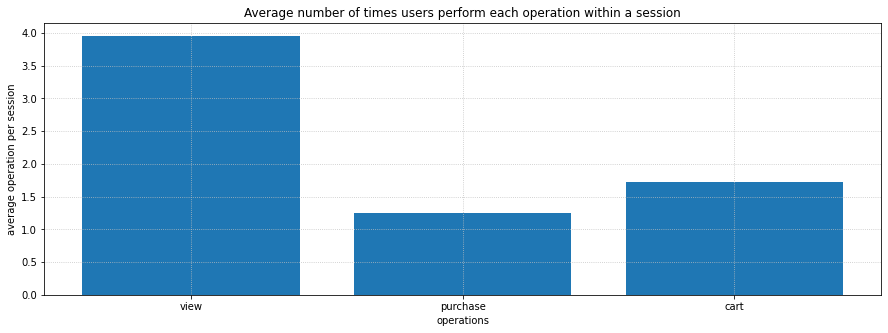

In [5]:
functions.plot_average_session(average_session, months)

As shown in the histogram grapg, the average number of times a user perform view operation within a session is 4. The average time about the purchase operation is around 1.3 and about the cart operation 1.7.

##### How many times, on average, a user views a product before adding it to the cart?

In [ ]:
average_view_cart = functions.compute_average_view_cart(df_names, months)

In [ ]:
print(average_view_cart)

##### What’s the probability that products added once to the cart are effectively bought?

For this task we consider the 'event_type' attribute and within it the purchase and cart events.

In [8]:
probability_cart_purchase = functions.compute_probability_cart_purchase(df_names, months)

In [9]:
print(probability_cart_purchase)

36.51


The result show that the probability of products once added to the cart are effectively bought is 36.51%.

##### What’s the average time an item stays in the cart before being removed?

In [ ]:
average_time_removed_item = functions.compute_average_time_removed_item(df_names, months)

In [ ]:
print(average_time_removed_item)

##### How much time passes on average between the first view time and a purchase/addition to cart?

For this task we consider the 'event_timw', 'event_type' and 'product_id' attributes.

In [ ]:
average_time_first_view = functions.compute_average_time_first_view(df_names, months)

In [ ]:
print(average_time_first_view)

## [RQ2] What are the categories of the most trending products overall? For each month visualize this information through a plot showing the number of sold products per category. 

For this task the attributes are 'product_id', 'category_code', 'event_type' events.

We decided to exclude the Nan values from the category_code event.

In order to obtain the sold product, we used the 'purchase' variable in the 'event_type' attribute to get the products sold during each month.

In [3]:
number_sold_per_category = functions.compute_number_sold_per_category(df_names, months)

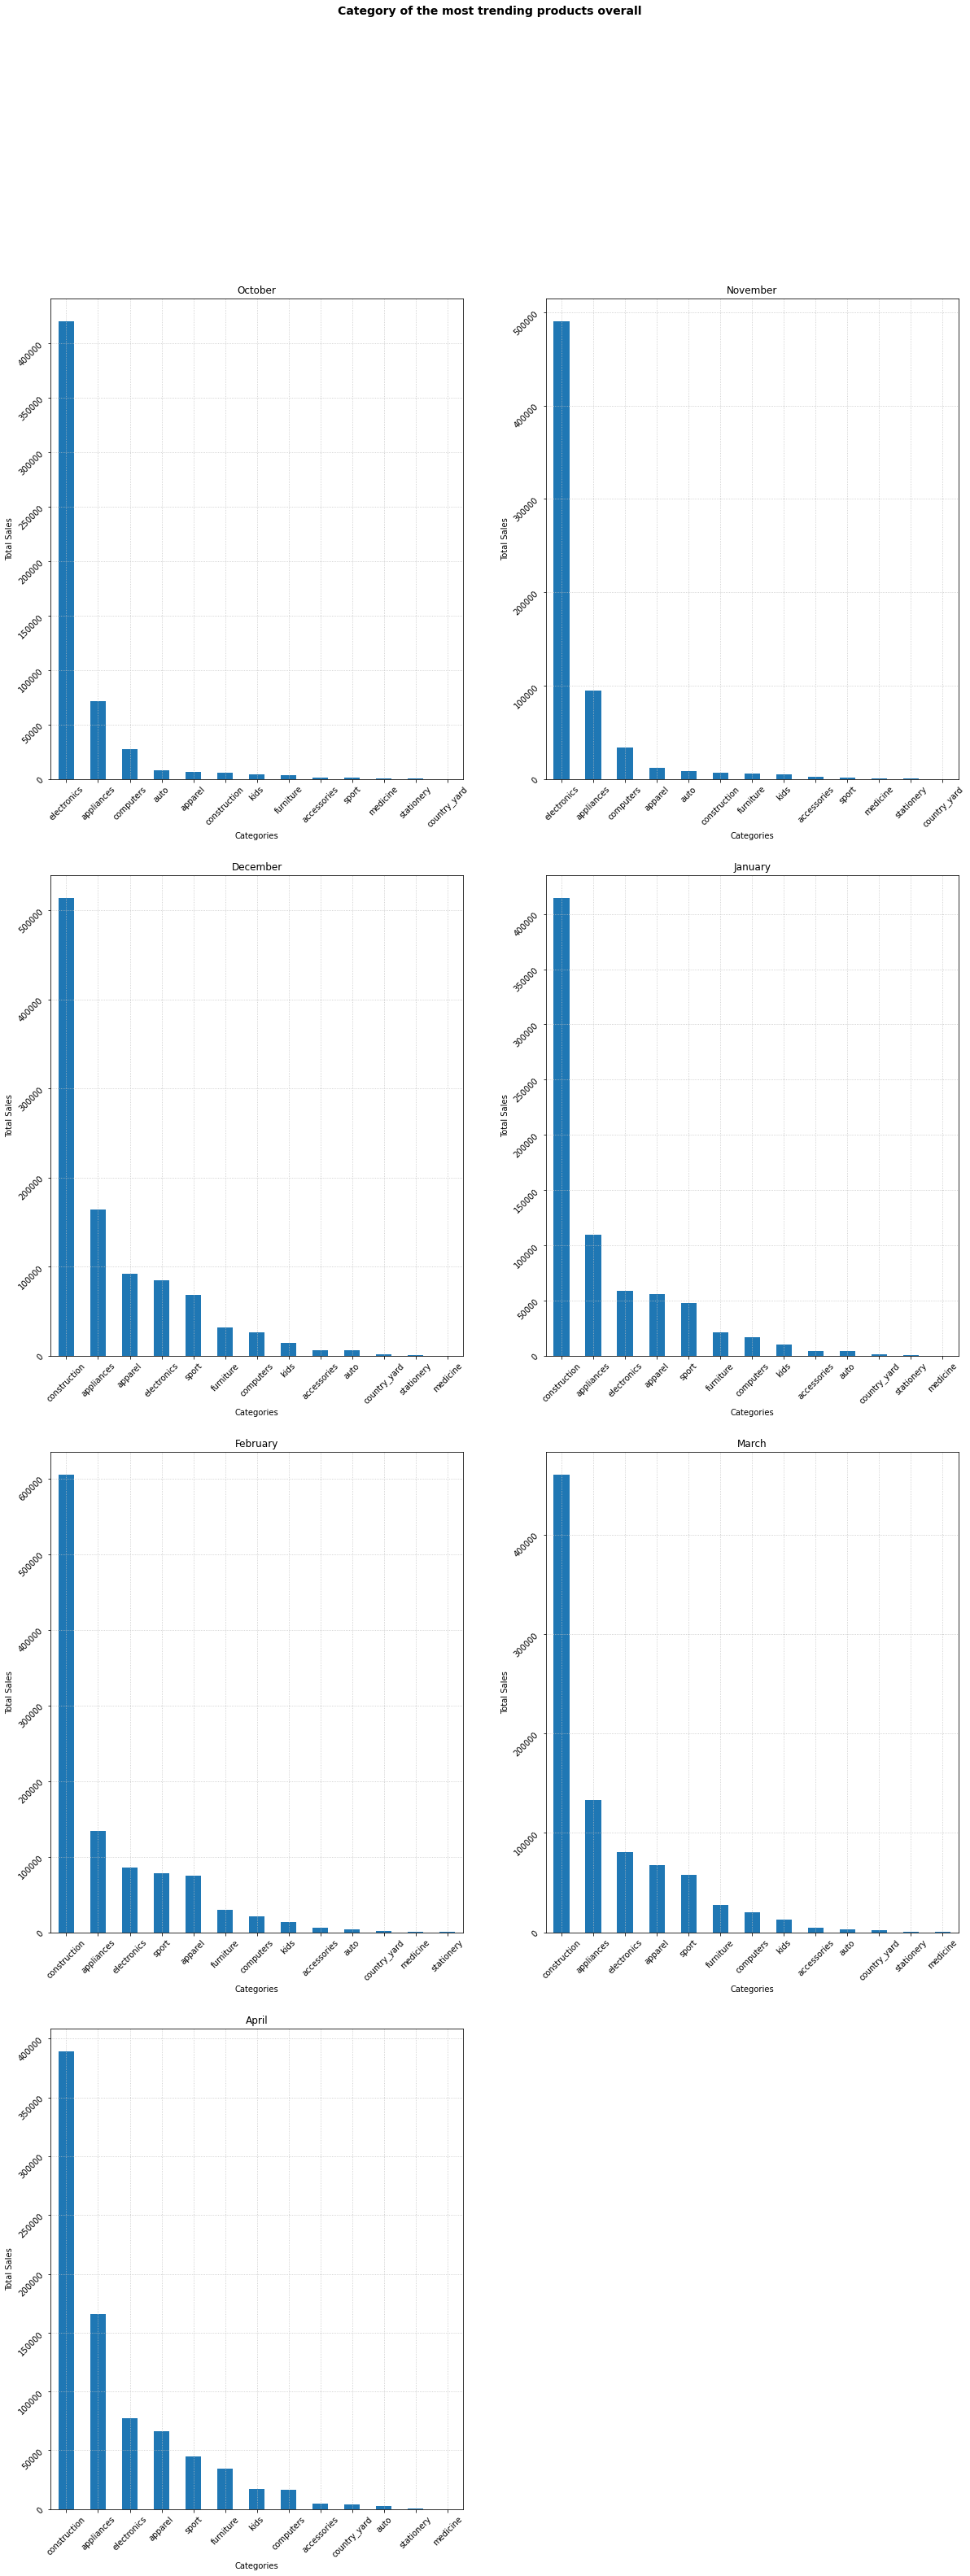

In [4]:
functions.plot_number_sold_per_category(number_sold_per_category, months)

As shown in the graphs in October and November the category with the most trending product is Electronics with approximately 450000 and 500000 sold products. In the months spanning between Decemeber and April the most trending product is Construction with approximately 350000 and 600000 sold products.

##### Plot the most visited subcategories.

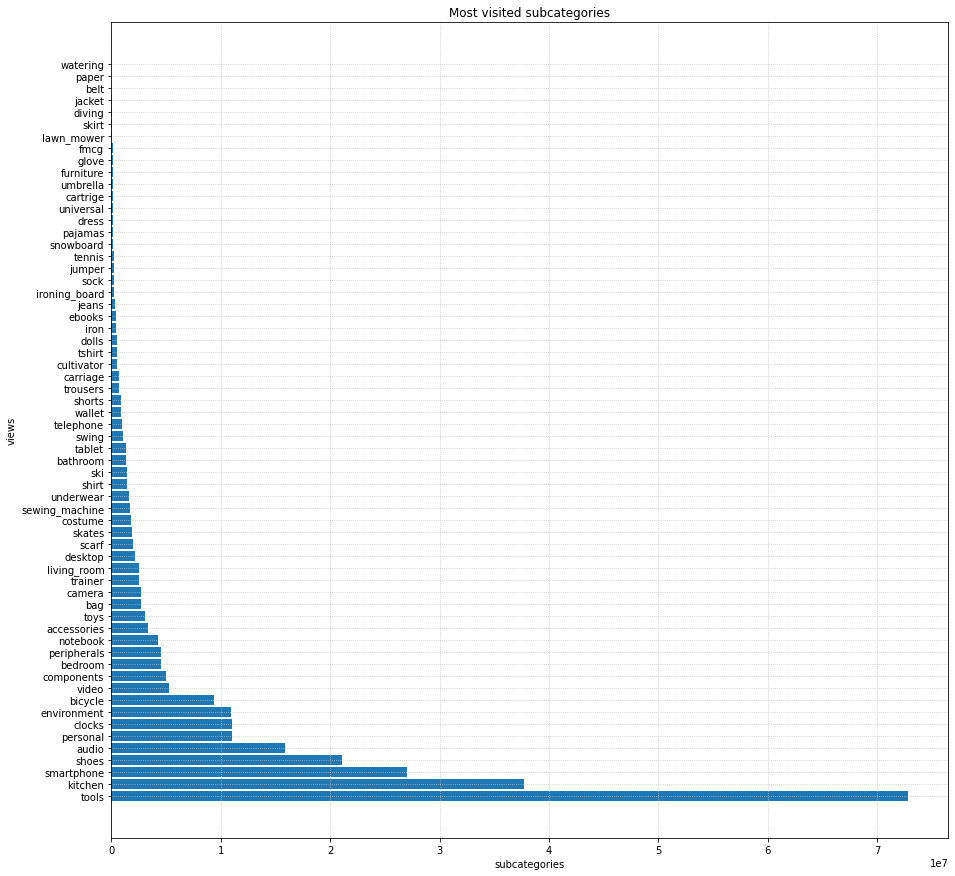

In [6]:
functions.plot_most_visited_subcategories(df_names, months)

##### What are the 10 most sold products per category?

For this task, we used the fuction 'compute_number_sold_per_category' in order to get the number of sold products per category.

In [5]:
functions.plot_10_most_sold(number_sold_per_category, months)

product_id
category_1              
construction     2394831
electronics      1298003
appliances        871494
apparel           373628
sport             298447
computers         160806
furniture         154366
kids               77828
auto               35087
accessories        29749

As shown in the upper table we can see that the most sold product by category within the highest 10 is Contruction with 2394831 sold products from October 2019 until April 2020. Instead, the lowest is Accessories with 29749 sold products.

# [RQ3] For each category, what’s the brand whose prices are higher on average?

##### Write a function that asks the user a category in input and returns a plot indicating the average price of the products sold by the brand.

For this task the only attributes we need are category_code, brand and price. We decided to select one category and show the plot of the function. The selected category is electronics.clocks

(<matplotlib.axes._subplots.AxesSubplot at 0x1f86dc4c308>, None)

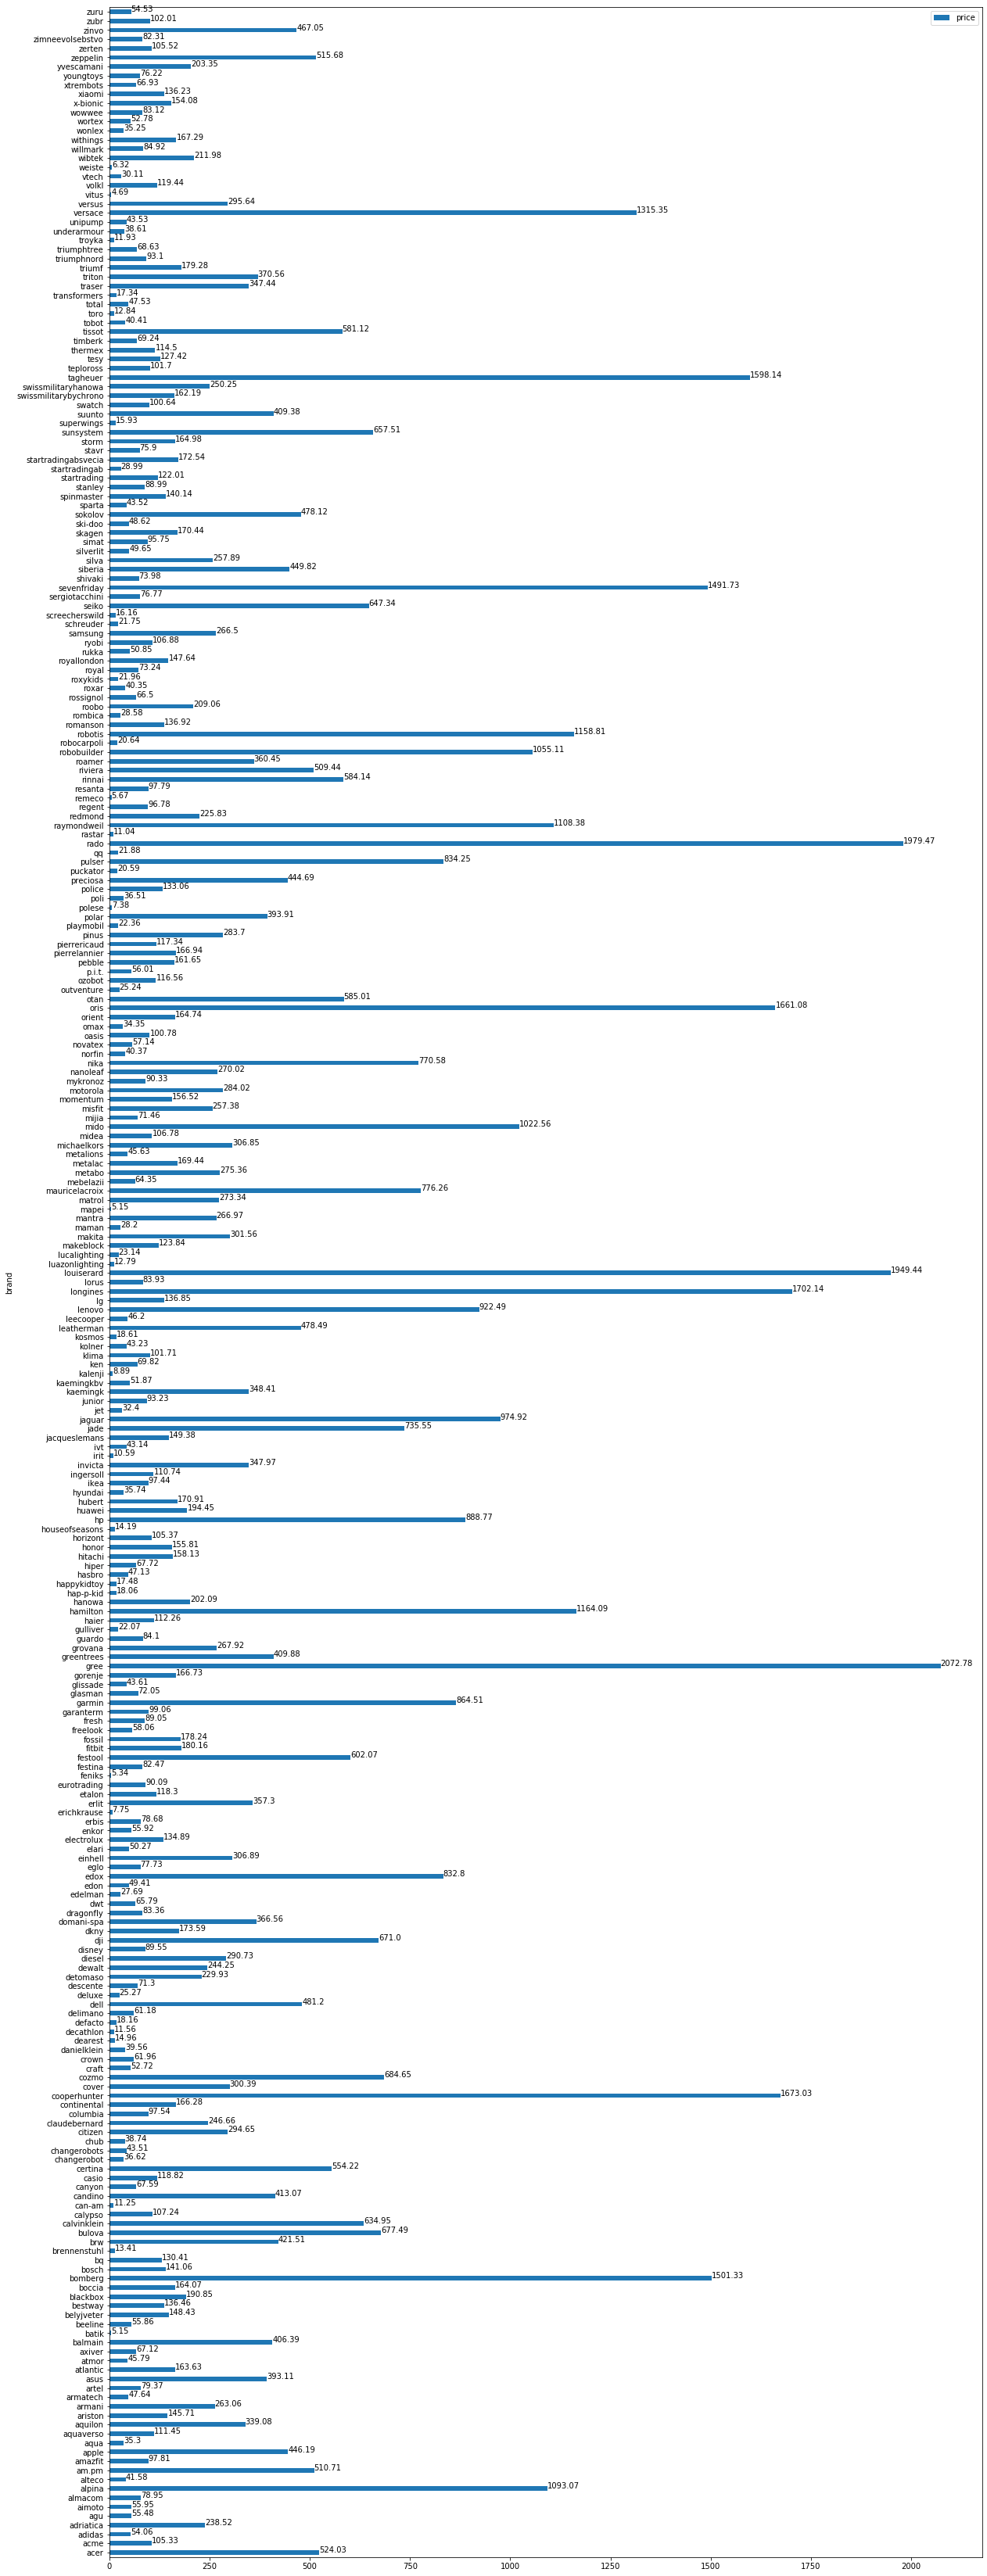

In [6]:
functions.plot_average_price_per_category('electronics.clocks', df_names)

 From the result we can see that the brand that sell clocks at higher price is Gree.\
 Gree average price for category = 2072.78\
 Another interesting see we can see from the plot is that the average price given a category changes a lot   between a brand and another one.\
 Minimum average price for this category = 4.69\
 Maximum average price for this category = 2072.78\
 There are many features that can affect the price of a product: the brand itself, the materials used and the industrial procesess are just an example
 

### Find, for each category, the brand with the highest average price. Return all the results in ascending order by price.

For this task the only attributes we need are category_code,brand and price so we select just those colums in the function.



In [5]:
functions.brand_with_highest_price_for_category(df_names)

category_code      brand        price
941                   stationery.paper       zewa     3.183594
868          computers.components.cdrw       asus    65.955080
316        auto.accessories.parktronic      plano   105.379014
875    computers.components.sound_card   bilstein   175.040000
747             construction.tools.axe      arena   181.928889
..                                 ...        ...          ...
890        construction.tools.painting       zipp  2571.360843
441          appliances.kitchen.toster  pinarello  2573.810000
249                      sport.bicycle  pinarello  2573.810000
700  appliances.kitchen.coffee_machine        aeg  2574.040000
363               electronics.video.tv       dexp  2574.040000

[140 rows x 3 columns]

From this output we can see that for example, given the category 'stationary.paper', the brand with the higher average price is Zewa with 3.183 , instead for the Tvs is Dexp with the price of 2574.04



## [RQ4] How much does each brand earn per month? Write a function that given the name of a brand in input returns, for each month, its profit. Is the average price of products of different brands significantly different?

The following function calculates the average price of products of different brands regardless the category_code.

In [7]:
functions.average_price_per_brand(df_names)

(                         price
 brand                         
 a-case                8.803658
 a-derma              14.326833
 a-elita              26.604351
 a-mega              103.391421
 a-toys               30.430199
 ...                        ...
 zwerg                28.154196
 zwilling            850.234341
 zwillingjahenckels  879.285742
 zx                   40.006630
 zyxel               169.670618
 
 [5675 rows x 1 columns], price    0.25
 dtype: float64, price    2570.98
 dtype: float64)

The first output after the dataframe is the lowest average price, while the second output is the highest.\
We can see from this output that the lower average price for a brand is equal to 0.25 while the highest is equal to 2570.98.\
So, as we have seen in the RQ3 question, there is a significant difference of prices of products between different brands

In [5]:
a = functions.make_df_purchase(df_names, months)

In [6]:
b = functions.earning_per_month(a, months)


In [5]:
functions.brand_per_month('apple', b, months)

{'October': 111189822.29001176,
 'November': 127490496.62999253,
 'December': 157396568.8500288,
 'January': 125844143.83997878,
 'February': 191755567.64998072,
 'March': 141315339.78002936,
 'April': 74288067.37999536}

The output of the function brand_per_month returns a dictionary where for every month there is the profit of the selected brand.\
The highest profit of Apple is during the month of February, the lowest is in April.\
Maybe Covid-19 influenced the profit? Unfortunately we don't have data from other months after April, so we can just suppose that basing on these data.

##### Using the function you just created, find the top 3 brands that have suffered the biggest losses in earnings between one month and the next, specifing bothe the loss percentage and the 2 months (e.g., brand_1 lost 20% between march and april).

In [7]:
functions.find_3_worst_brand(b, months)

blackberry lost 99.95% bewteen January and the month before 
ea lost 99.81% bewteen February and the month before 
alkor lost 99.67% bewteen February and the month before 


The output shows the top 3 brands with the biggest losses: Blackberry, Ea and Alkor had the biggest losses(almost 100%!!).\
We do not know if a cause could have been Covid-19 but probably it is.\
The interesting thing is that these brands are not unknown so there should have been something that cause such a big loss.




## [RQ5] In what part of the day is your store most visited?


For this task the dataset attributes that we need are "event_time" and "user_id".

We have chosen to create a plot for each month in order to make clearly visible the number of visitors to the store compared to the hours of the day.

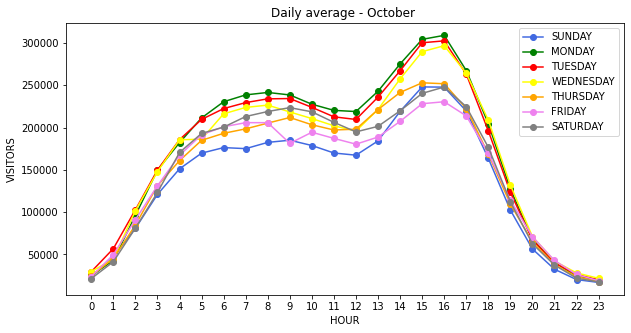

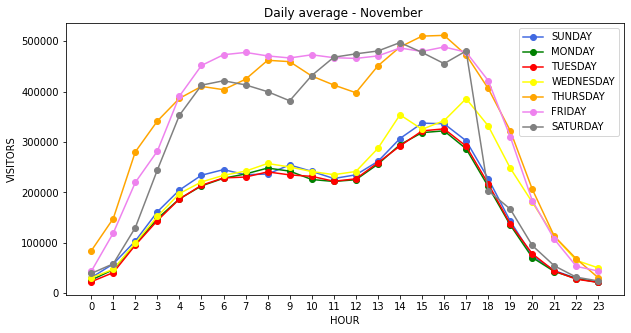

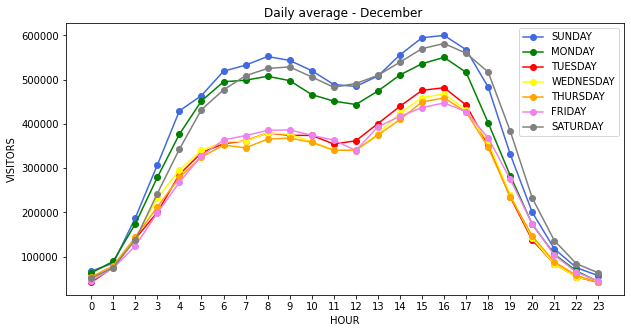

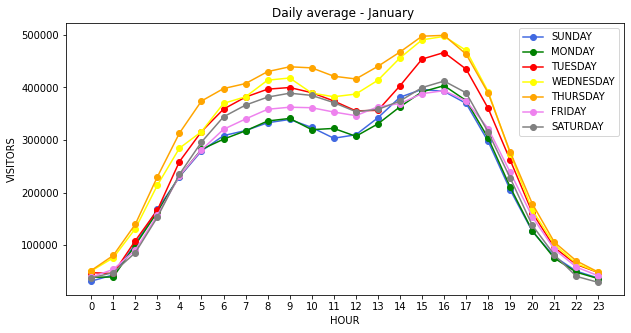

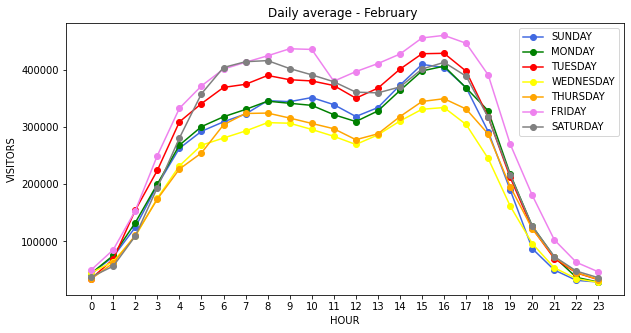

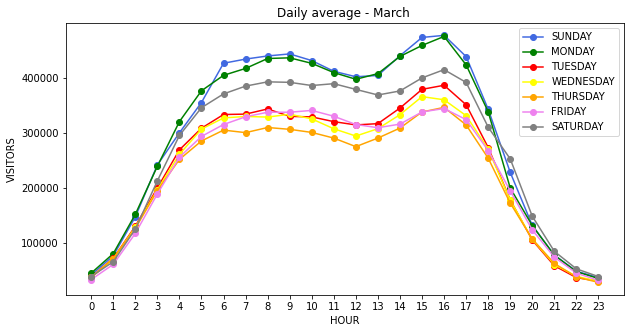

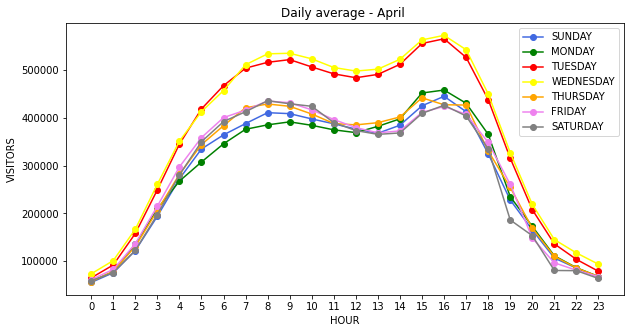

In [7]:
functions.plot_hour_avg(df_names, months)

Our analisis shows that for the month of October the highest number of visitors took place on Mondays around 5pm with more than 300.000 visitors, on Tuesdays from 4pm to 5pm and on Wednesdays around 5pm with just under 300.000 visitors.
For the month of November visits to the store were carried out mainly on Fridays between 6am and 5pm, on Saturdays from 11am to 5pm and on Thursdays from 3pm to 5pm with almost 500.000 visitors.
On December there was the highest number of visitors ever, equal to 600.000 on Sundays between 4pm and 5pm and on Saturdays around 4pm, on Mondays just over 500.000 visitors around 4pm.
For the month of January the highest number of visitors is 500,000, obtained on Wednesdays and on Thursdays from 4pm to 5 pm.
In February the number of visitors dropped to 400.000, on Fridays from 9am to 10am and from 3pm to 5pm, on Saturdays from 6am to 8am, on Tuesdays between 3pm and 4 pm and on Sundays around 3pm.
Also for the month of March the highest number of visitors fluctuates around 400.000, on Sundays and on Mondays in the time slot between 6am and 5pm.
In April the peak of visitors returns to around 500.000, on Tuesdays and on Wednesdays from 8am to 5pm.

## [RQ6] The conversion rate of a product is given by the number of times a product has been bought over the number of times it has been visited. What's the conversion rate of your online store? 

##### Find the overall conversion rate of your store.

##### Plot the number of purchases of each category and show the conversion rate of each category in decreasing order.

For this task we need the "event_type" and "category_code" attributes.

Since the first request is: calculate the overall conversion rate, we have chosen to calculate the conversion rate for each month as the total number of products purchased divided by the total number of products viewed.
For the second request we have chosen to plot for each month the number of purchase for each category and to show for each month the conversion rate in decreasing order.

Overall conversion rate of October
0.021804357212960108


<Figure size 432x288 with 0 Axes>

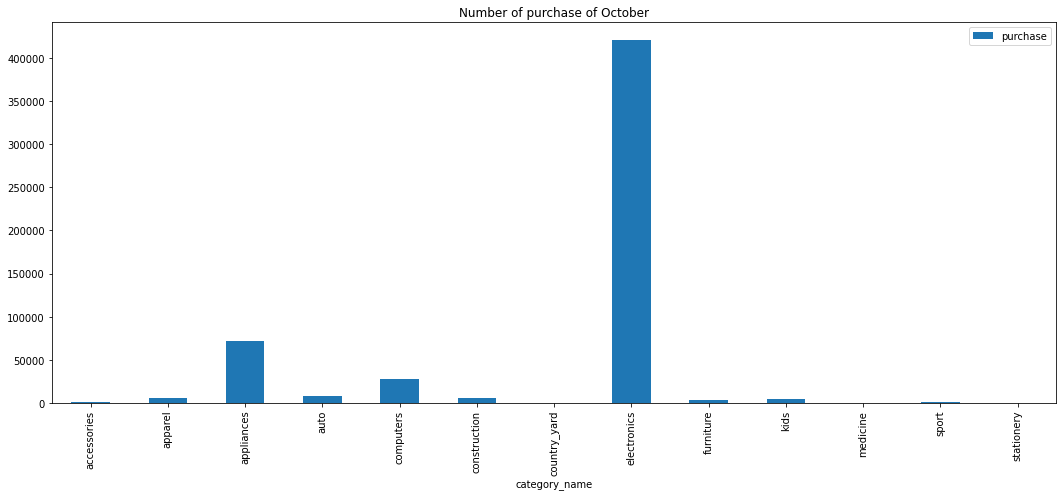

Conversion rate of each category of October
category_name
electronics     0.028508
medicine        0.022773
stationery      0.020379
appliances      0.015828
computers       0.012342
kids            0.010870
auto            0.010442
construction    0.010112
furniture       0.007167
accessories     0.006961
sport           0.006807
apparel         0.005469
country_yard    0.005022
dtype: float64
Overall conversion rate of November
0.01676846522515221


<Figure size 432x288 with 0 Axes>

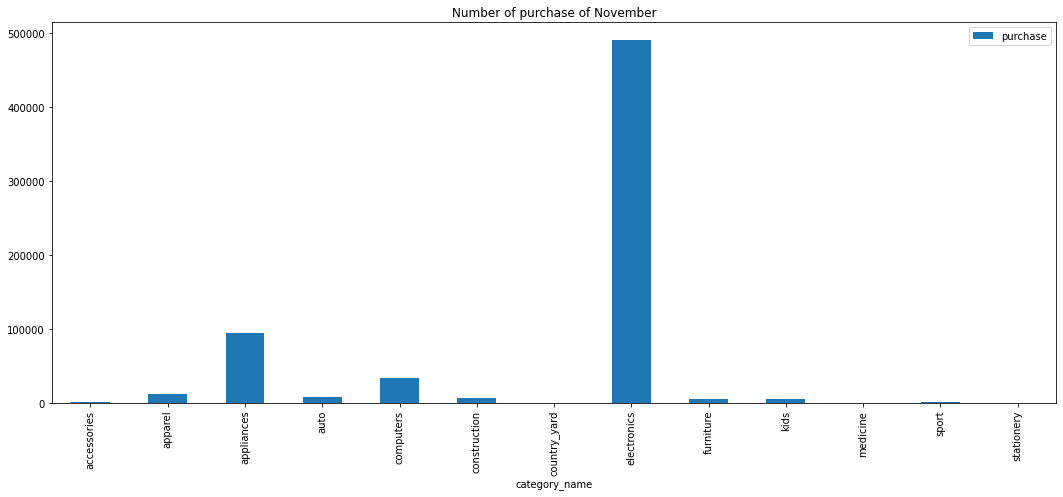

Conversion rate of each category of November
category_name
electronics     0.022737
medicine        0.017072
stationery      0.016369
appliances      0.012466
auto            0.009084
computers       0.008560
kids            0.008056
construction    0.007908
furniture       0.005862
accessories     0.005716
sport           0.005558
apparel         0.004991
country_yard    0.003534
dtype: float64
Overall conversion rate of December
0.02025097483629493


<Figure size 432x288 with 0 Axes>

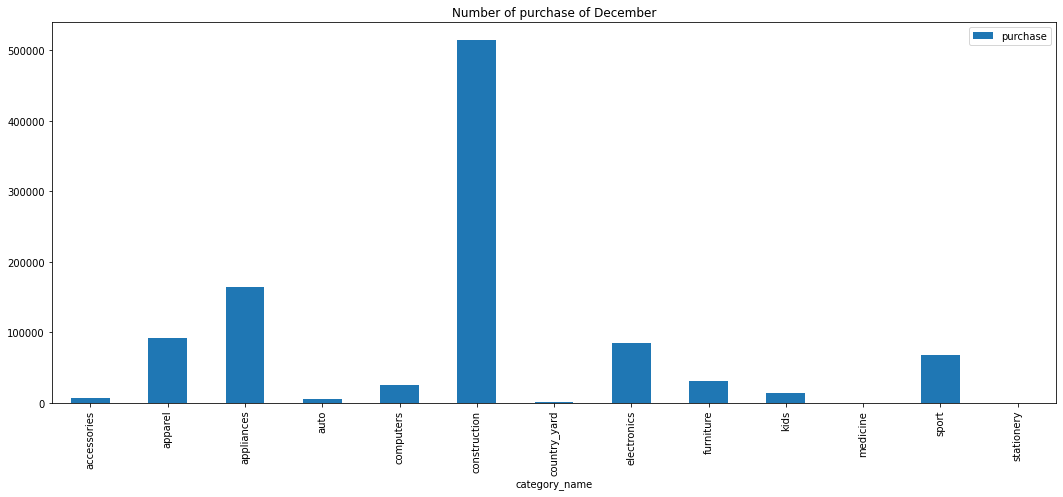

Conversion rate of each category of December
category_name
construction    0.032368
sport           0.022667
appliances      0.015854
country_yard    0.015534
electronics     0.013583
apparel         0.013418
furniture       0.013114
auto            0.011572
stationery      0.010986
computers       0.010904
kids            0.010724
accessories     0.008613
medicine        0.007056
dtype: float64
Overall conversion rate of January
0.017566439879751514


<Figure size 432x288 with 0 Axes>

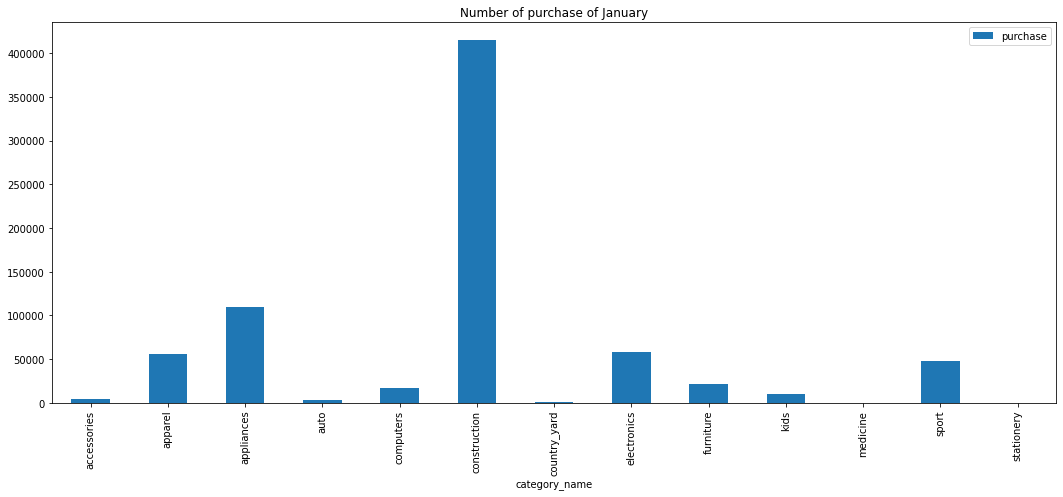

Conversion rate of each category of January
category_name
construction    0.028507
sport           0.017929
appliances      0.013356
electronics     0.011667
auto            0.010535
furniture       0.010445
apparel         0.009926
country_yard    0.009541
kids            0.008601
computers       0.008524
stationery      0.007671
accessories     0.007073
medicine        0.005068
dtype: float64
Overall conversion rate of February
0.026754824567040727


<Figure size 432x288 with 0 Axes>

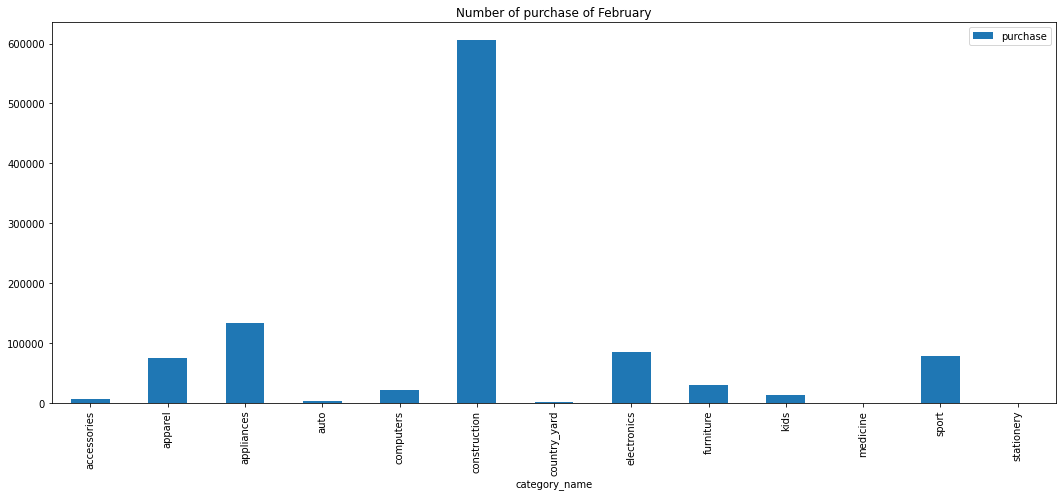

Conversion rate of each category of February
category_name
construction    0.042544
sport           0.030110
appliances      0.018760
electronics     0.017790
furniture       0.015999
country_yard    0.015450
auto            0.015329
apparel         0.014946
computers       0.014369
kids            0.012817
stationery      0.010989
accessories     0.007774
medicine        0.006641
dtype: float64
Overall conversion rate of March
0.021682196440956765


<Figure size 432x288 with 0 Axes>

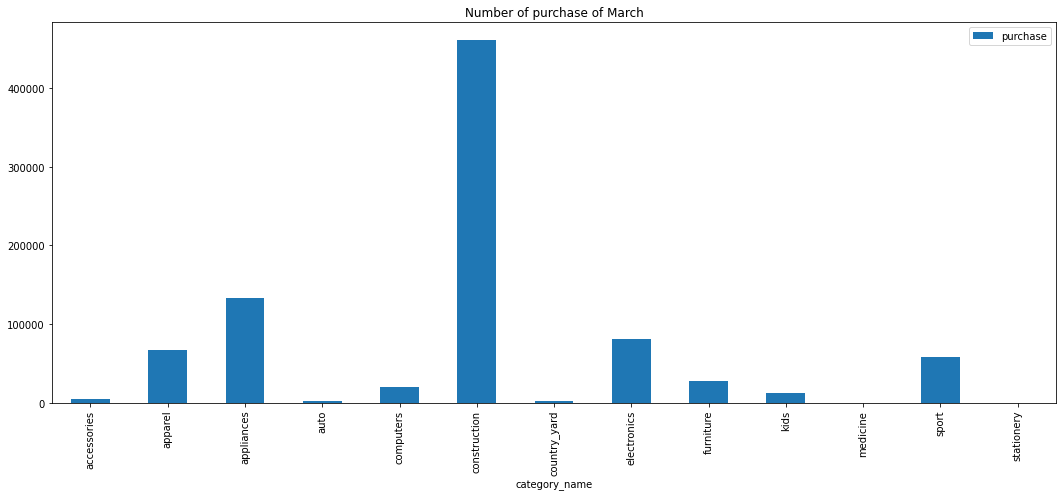

Conversion rate of each category of March
category_name
construction    0.034643
sport           0.023974
appliances      0.015897
electronics     0.014637
apparel         0.014192
furniture       0.014049
country_yard    0.013022
computers       0.012450
auto            0.011884
kids            0.011413
stationery      0.009786
accessories     0.007793
medicine        0.005500
dtype: float64
Overall conversion rate of April
0.01690120555964353


<Figure size 432x288 with 0 Axes>

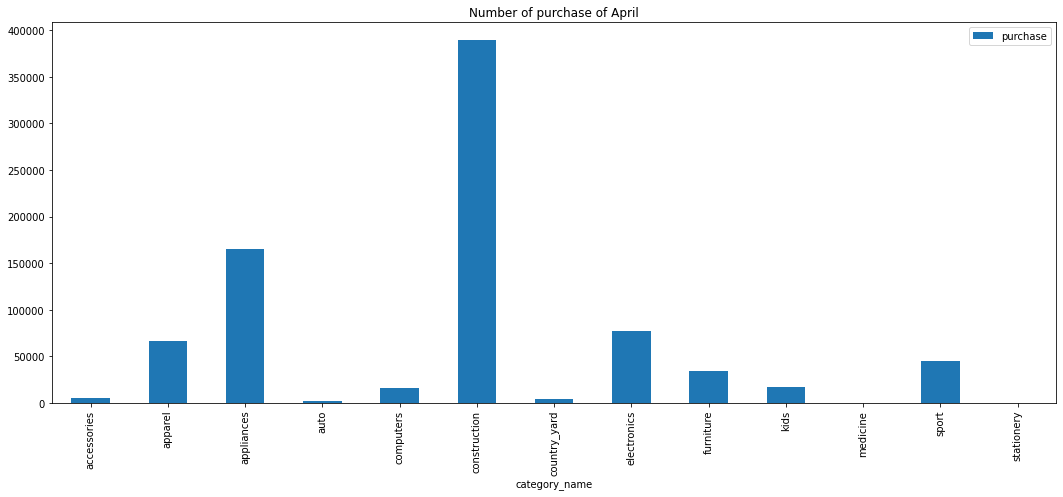

Conversion rate of each category of April
category_name
construction    0.026571
sport           0.016122
country_yard    0.014498
furniture       0.013386
appliances      0.013379
electronics     0.012181
apparel         0.011703
stationery      0.011460
kids            0.011405
computers       0.009836
accessories     0.009121
auto            0.008726
medicine        0.006107
dtype: float64


In [8]:
functions.conversion_rate(df_names, months)

Knowing that the conversion rate of a product is given by the number of times a product has been bought over the number of times it has been visited, the results obtained are the following:
The overall conversion rate of each month is:
- October 2,2%
- November 1,6%
- December 2%
- January 1,7%
- February 2,7%
- March 2,2%
- April 1,7%

As for the categories where the largest number of products were sold, we have in the months of October and November sales of electronics around 500.000, appliances around 100.000 and computers around 50.000.
In the months of December and January the categories that have sold the most are construction between 400.000 and 500.000 sales, appliances between 100.000 and 200.000, and apparel around 100.000.
For the months of February, March and April we have construction' sales fluctuating between 400.000 and 600.000, sales of appliances between 150.000 and 175.000, and sales of electronics products equal to 100.000.

From the analyzes carried out, the categories with the highest conversion rate are construction, with a rate that varies in the months between 2.6% and 4.2%, and sports with a rate that varies between 1.6% and 3%.


## [RQ7] The Pareto principle states that for many outcomes roughly 80% of consequences come from 20% of the causes. Also known as 80/20 rule, in e-commerce simply means that most of your business, around 80%, likely comes from about 20% of your customers.


##### Prove that the pareto principle applies to your store.

For this task we have used "user_id","event_type","price" attributes.

For each month, we have decided to calculate the money spent by 20% of users and 80% of the total profit. Then we have compared the two values obtained to verify if the Pareto's principle is applied.

In [3]:
functions.pareto(df_names,months)

87% of the profit for the month of October comes from 20% of the user's purchases
For the month of October Pareto's principle is applied.
83% of the profit for the month of November comes from 20% of the user's purchases
For the month of November Pareto's principle is applied.
88% of the profit for the month of December comes from 20% of the user's purchases
For the month of December Pareto's principle is applied.
87% of the profit for the month of January comes from 20% of the user's purchases
For the month of January Pareto's principle is applied.
90% of the profit for the month of February comes from 20% of the user's purchases
For the month of February Pareto's principle is applied.
86% of the profit for the month of March comes from 20% of the user's purchases
For the month of March Pareto's principle is applied.
84% of the profit for the month of April comes from 20% of the user's purchases
For the month of April Pareto's principle is applied.


Based on the results obtained, we can state that the Pareto's principle is applied to our analyzed online store, as this principle is verified for each month.